In [1]:
import numpy as np
import matplotlib.pyplot as plt
import filtering as flt

## Model parameters

In [2]:
####### simulation parameters
np.random.seed(1)

kappa_y = 10 # precision of increment observations

T = 100 # simulation time
dt = 0.01 # step size
t = np.arange(0,T,dt)
kappa_phi = 1 # inverse diffusion constant
alpha = 0 # precision of direct observations, lin apprx
phi_0 = 0 # initial mean
kappa_0 = 20 # initial certainty
z = np.zeros(int(T/dt))

##### generate the trajectory and observations
# create hidden state trajectory and observation sequence
phi, dy, z = flt.generateData(T,kappa_phi,kappa_y=kappa_y,alpha=alpha,dt=dt,phi_0=phi_0)

## Filtering algorithms
### Von Mises Projection Filter

In [3]:
mu_VM, kappa_VM = flt.vM_Projection_Run(T,kappa_phi,z=z,alpha=alpha,dy=dy,kappa_y=kappa_y,
                        phi_0=phi_0,kappa_0=kappa_0,dt=dt)

### Gauss ADF

In [4]:
mu_G, kappa_G = flt.GaussADF_run(T,kappa_phi,z=z,alpha=alpha,dy=dy,kappa_y=kappa_y,phi_0=phi_0,kappa_0=kappa_0,dt=dt)

### Particle filter (benchmark)

In [6]:
N = 10000
mu_PF, r_PF = flt.PF_run(T,N,kappa_phi,z=z,alpha=alpha,dy=dy,kappa_y=kappa_y,phi_0=phi_0,kappa_0=kappa_0,dt=dt)

## Figure 1a

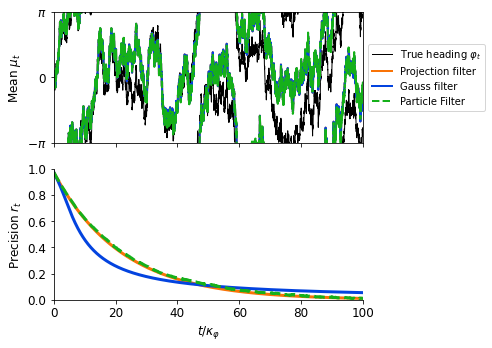

In [7]:
plt.rcParams.update({'font.size': 12})

col_PF = 'xkcd:green'
col_ADF = 'xkcd:blue'
col_vM = 'xkcd:orange'

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5),sharex=True)

line1 = ax1.plot(*flt.circplot(t,phi),linewidth=1,label=r'True heading $\varphi_t$', color='black')
line2 = ax1.plot(*flt.circplot(t,mu_VM),linewidth=2,label=r'Projection filter',color=col_vM)
line3 = ax1.plot(*flt.circplot(t,mu_G),linewidth=2,label=r'Gauss filter',color=col_ADF)
line4 = ax1.plot(*flt.circplot(t,mu_PF),'--',linewidth=2,label=r'Particle Filter',color=col_PF)
ax1.set_xlim([0,T])
ax1.set_ylim([-np.pi,np.pi])
ax1.set_ylabel(r'Mean $\mu_t$')
ax1.set_yticks([0., - np.pi, np.pi])
ax1.set_yticklabels(["$0$",r"$-\pi$",r"$\pi$"])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)


ax2.plot(t,flt.A_Bessel(kappa_VM),linewidth=3,label=r'Projection filter',color=col_vM)
ax2.plot(t,flt.A_Bessel(kappa_G),linewidth=3,label=r'Gauss filter',color=col_ADF)
ax2.plot(t,r_PF,'--',linewidth=3,label=r'Particle Filter',color=col_PF)
ax2.set_xlabel(r'$t/\kappa_{\varphi}$')


ax2.set_xlim([0,T])
ax2.set_ylim([0,1])
ax2.set_ylabel(r'Precision $r_t$')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.1)

fig.tight_layout()
plt.show()